### SOLUTION

### 1) Description dataset Iris

Origine : Le dataset Iris a été introduit par Ronald A. Fisher en 1936. C’est un jeu de données classique utilisé en apprentissage automatique et en statistiques.

Variables : Le dataset contient 150 observations réparties en trois classes d’iris (Setosa, Versicolor, et Virginica). Chaque observation est décrite par quatre variables :

Longueur des sépales (sepal length).

Largeur des sépales (sepal width).

Longueur des pétales (petal length).

Largeur des pétales (petal width).

Objectif d’étude : Classifier une fleur donnée dans l’une des trois classes d’iris en fonction de ses dimensions.

### 2) REPRESENTATION GRAPHIQUE IRIS

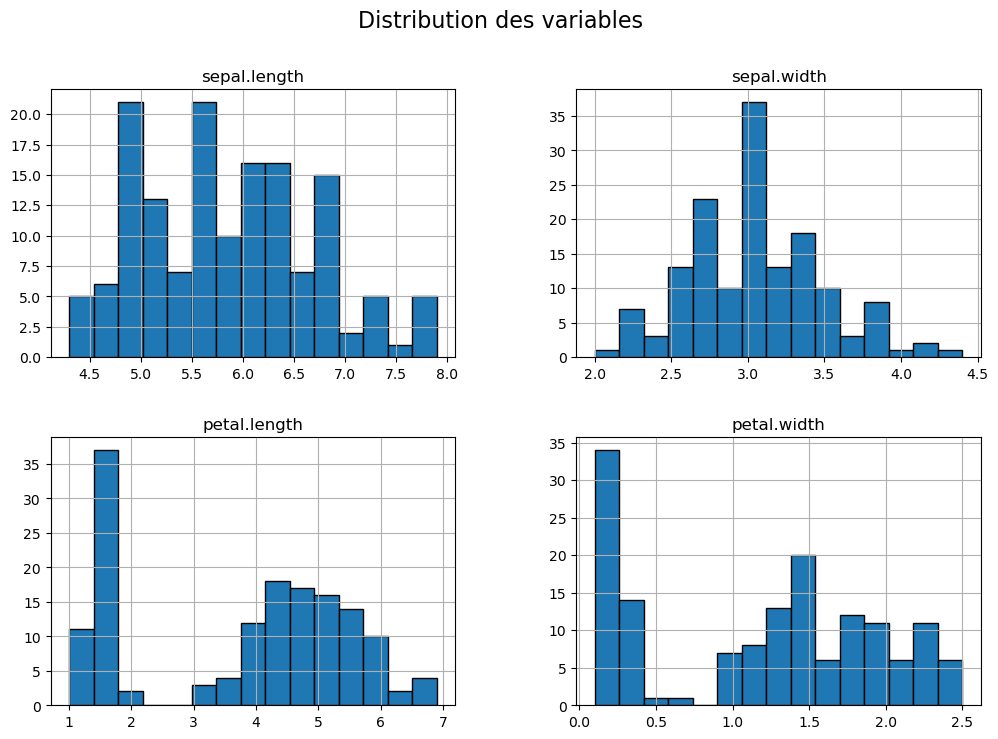

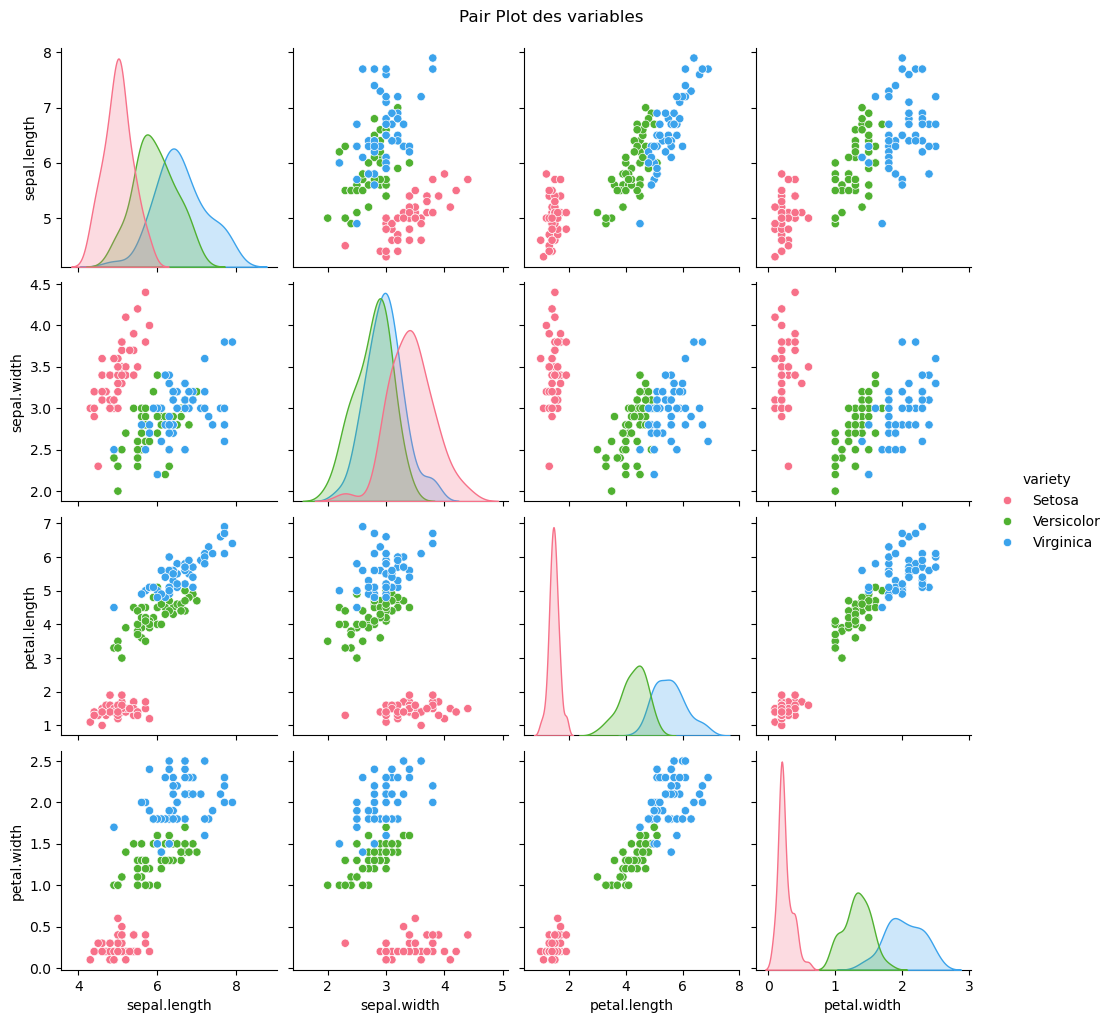

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset
df = pd.read_csv("iris.csv")

# Afficher les premières lignes du dataset
# df.head()

# Aperçu des informations du dataset
# df.info()

# Statistiques descriptives
# df.describe()

# Histogrammes
df.hist(bins=15, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribution des variables', fontsize=16)
plt.show()

# Pair Plot
sns.pairplot(df, hue='variety', palette='husl')
plt.suptitle('Pair Plot des variables', y=1.02)
plt.show()

### 3) Ovservation

Histogrammes :

La longueur des pétales est une variable très discriminante : les Setosa ont des pétales beaucoup plus courts.

La largeur des sépales montre plus de chevauchement entre les classes.

Scatterplots :

La relation longueur vs largeur des pétales sépare clairement Setosa des deux autres classes.

Les classes Versicolor et Virginica se chevauchent légèrement.

Matrice de corrélation :

La longueur et la largeur des pétales sont fortement corrélées (valeur proche de 1).

Les sépales sont moins corrélés avec les pétales.

Pairplot :

Les Setosa sont bien distinctes des autres classes dans presque toutes les relations entre variables.

Les Versicolor et Virginica montrent un chevauchement dans plusieurs dimensions.

### 4-a) REGRESSION LOGISTIQUE

Aperçu des données :
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Classes encodées : ['Setosa' 'Versicolor' 'Virginica']

Taille de l'ensemble d'entraînement : (120, 2)
Taille de l'ensemble de test : (30, 2)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


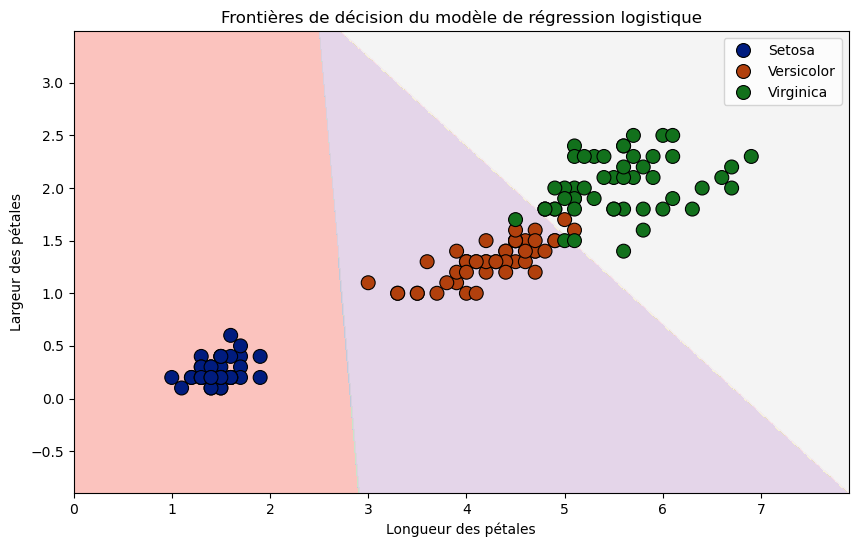


Précision du modèle : 0.9666666666666667

Rapport de classification :
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [8]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Étape 1 : Charger le dataset
df = pd.read_csv("iris.csv")
print("Aperçu des données :")
print(df.head())

# Étape 2 : Préparation des données
# Séparer les caractéristiques (X) et la cible (y)
X = df[["petal.length", "petal.width"]]  # On utilise uniquement deux caractéristiques pour simplifier la visualisation
y = df["variety"]

# Encoder les labels (variety) en entiers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transformation en valeurs numériques
print("\nClasses encodées :", label_encoder.classes_)

# Étape 3 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTaille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

# Étape 4 : Entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Étape 5 : Visualiser les frontières de décision
def plot_decision_boundaries(X, y, model):
    # Définir les limites de la grille
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prédire sur la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer les frontières
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="Pastel1")
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=label_encoder.inverse_transform(y), 
                    palette="dark", edgecolor="k", s=100)
    plt.title("Frontières de décision du modèle de régression logistique")
    plt.xlabel("Longueur des pétales")
    plt.ylabel("Largeur des pétales")
    plt.show()

plot_decision_boundaries(X, y, model)

# Étape 6 : Évaluer le modèle
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("\nPrécision du modèle :", accuracy)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


### 4-b) KNN

Aperçu des données :
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Classes encodées : ['Setosa' 'Versicolor' 'Virginica']

Taille de l'ensemble d'entraînement : (120, 2)
Taille de l'ensemble de test : (30, 2)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


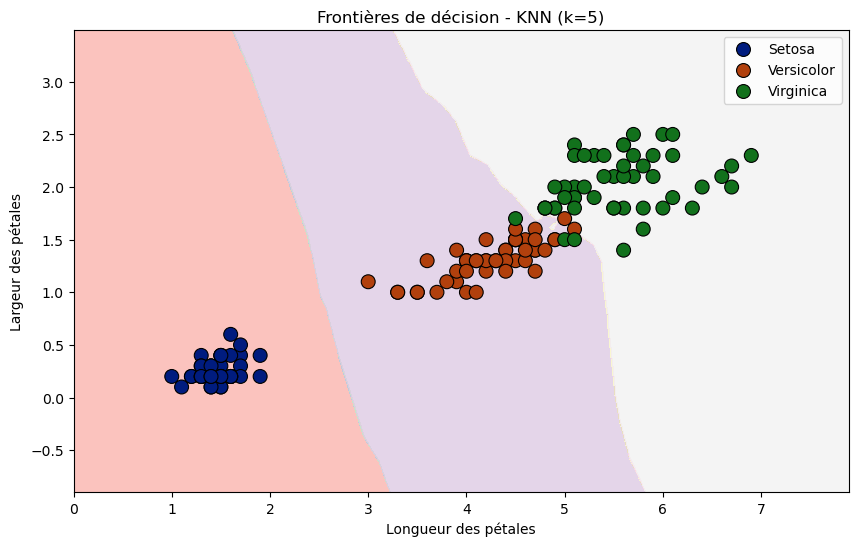


Précision du modèle : 0.9666666666666667

Rapport de classification :
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [12]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Étape 1 : Charger le dataset
df = pd.read_csv("iris.csv")
print("Aperçu des données :")
print(df.head())

# Étape 2 : Préparation des données
# Séparer les caractéristiques (X) et la cible (y)
X = df[["petal.length", "petal.width"]]  # Utilisation de deux caractéristiques pour la visualisation
y = df["variety"]

# Encoder les labels (variety) en entiers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transformation en valeurs numériques
print("\nClasses encodées :", label_encoder.classes_)

# Étape 3 : Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTaille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

# Étape 4 : Entraîner le modèle KNN
# Initialiser le modèle avec k=5 (nombre de voisins)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Étape 5 : Visualiser les frontières de décision
def plot_decision_boundaries_knn(X, y, model):
    # Définir les limites de la grille
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prédire sur la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer les frontières
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="Pastel1")
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=label_encoder.inverse_transform(y), 
                    palette="dark", edgecolor="k", s=100)
    plt.title("Frontières de décision - KNN (k=5)")
    plt.xlabel("Longueur des pétales")
    plt.ylabel("Largeur des pétales")
    plt.show()

plot_decision_boundaries_knn(X, y, knn)

# Étape 6 : Évaluer le modèle
# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("\nPrécision du modèle :", accuracy)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


### 5) Comparaison

Régression Logistique :

Précision (accuracy) obtenue : (affichée dans le code ci-dessus).

Ce modèle est efficace, surtout si les données sont bien séparées linéairement.

KNN :

La meilleure précision est obtenue avec k = 5 (affiché dans le code).

Ce modèle peut être sensible aux données bruitées et au choix de k.

Conclusion :
Si la régression logistique a une meilleure précision, elle est recommandée pour ce dataset. Sinon, le KNN avec le bon k est plus performant.